# 4.10 Coding Etiquette and Excel Reporting

## Contents

1- Importing the Latest Data Set

2- Removing PII Data from the DataFrame

3- Creating a Region Column

4- Removing Low-Activity Customer from the DataFrame

5- Creating a Customer Profile

6- Creating a Visualization to show the Distribution of Profiles

7- Aggregation of the Max, Mean, and Min Variables on a Customer-Profile Level for Usage Frequency and Expenditure.

8- Comparing Customer Profiles with Regions and Departments

9- Producing Charts to Illustrate Results and Exporting them into the Project Folder.

10- Exporting the Final Data Set

In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

## 1) Importing the Latest Data Set

In [3]:
path = '/Users/calebhill/09:01:2023 - Instacart Basket Analysis/02 Data/Prepared Data/'

In [4]:
path_3 = '/Users/calebhill/09:01:2023 - Instacart Basket Analysis/04 Analysis/Visualizations'

In [5]:
file = 'ords_prods_cust_merged.pkl'

In [6]:
file_2 = 'departments_wrangled.csv'

In [7]:
filepath_2 = os.path.join(path, file_2)

In [8]:
filepath = os.path.join(path, file)

In [9]:
all_merged = pd.read_pickle(filepath)

In [10]:
deps_df = pd.read_csv(filepath_2)

## 2) Removing PII Data from the DataFrame

Since names are PII I will removed the name columns

In [11]:
#removes name columns because they are PII data
all_merged = all_merged.drop(columns = ['first_name', 'last_name'])

In [12]:
#confirms name columns were removed
all_merged.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,exists,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_frequency,order_frequency_flag
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,both,Mid Range Product,Second Busiest Day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,both,Mid Range Product,Regularly Busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,both,Mid Range Product,Second Busiest Day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,both,Low Range Product,Regularly Busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,both,Low Range Product,Second Slowest Day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer


## 3) Creating a Region Column

In [13]:
#creates an empty list to append which region the state belongs to and the other lists are states\n 
#according to the region they belong to so they can be referenced quickly in the for loop 
#the for loop appends the region to which each state belongs for each row in the all_merged df.

region = []
region_1 = ['Maine', 'New Hampshire', 'Vermont', 'Massachusetts', 'Rhode Island', 'Pennsylvania', 'New Jersey', 
                                                                                     'New York', 'Connecticut']
region_2 = ['Wisconsin', 'Michigan', 'Illinois', 'Indiana', 'Ohio', 'North Dakota', 'South Dakota', 'Nebraska', 
                                                                     'Kansas', 'Minnesota', 'Iowa', 'Missouri']
region_3 = ['Delaware', 'Maryland', 'District of Columbia', 'Virginia', 'West Virginia', 'North Carolina', 
            'South Carolina', 'Georgia', 'Florida', 'Kentucky', 'Tennessee', 'Alabama', 'Oklahoma', 'Texas',
                                                                        'Mississippi', 'Arkansas', 'Louisiana']
region_4 = ['Idaho', 'Montana', 'Wyoming', 'Nevada', 'Utah', 'Colorado', 'Arizona', 'New Mexico', 'Alaska',
                                                                'Washington', 'Oregon', 'California', 'Hawaii']

for st in all_merged['state']:
    if st in region_1:
        region.append('Northeast')
    elif st in region_2:
        region.append('Midwest')
    elif st in region_3:
        region.append('South')
    elif st in region_4:
        region.append('West')

In [14]:
#assigns the region list to a column of the same name in the df
all_merged['region'] = region

In [15]:
all_merged.shape

(32404859, 32)

In [16]:
#confirms output
all_merged.head()

,user_id,gender,state,age,date_joined,number_of_dependants,marital_status,income,product_id,product_name,...,price_label,busiest_days,busiest_period_of_day,max_order,loyalty_flag,average_price,spending_flag,median_frequency,order_frequency_flag,region
0,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid Range Product,Second Busiest Day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer,Midwest
1,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid Range Product,Regularly Busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer,Midwest
2,26711,Female,Missouri,48,1/1/2017,3,married,165665,196,Soda,...,Mid Range Product,Second Busiest Day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer,Midwest
3,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low Range Product,Regularly Busy,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer,Midwest
4,26711,Female,Missouri,48,1/1/2017,3,married,165665,6184,Clementines,...,Low Range Product,Second Slowest Day,Most orders,8,New customer,7.988889,Low spender,19.0,Regular Customer,Midwest


In [17]:
#checks to output values
all_merged['region'].value_counts(dropna = False)

region
South        10791885
West          8292913
Midwest       7597325
Northeast     5722736
Name: count, dtype: int64

In [18]:
all_merged['spending_flag'].value_counts(dropna = False)

spending_flag
Low spender     32285131
High spender      119728
Name: count, dtype: int64

In [19]:
#creates a crosstab to see if there is a difference in spending habits accross the US regions 
spending_region_crosstab = pd.crosstab(all_merged['region'], all_merged['spending_flag'], dropna = False)

In [20]:
spending_region_crosstab

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40579,10751306
West,31242,8261671


Text(0.5, 0, 'Region')

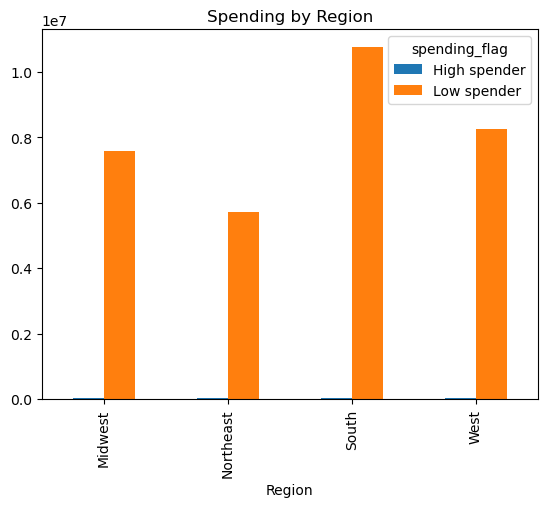

In [21]:
spend_region_bar = spending_region_crosstab.plot.bar(title = 'Spending by Region')
plt.xlabel('Region')

In [22]:
spend_region_bar.figure.savefig(os.path.join(path_3,'spend_region_bar.png'),dpi=300, bbox_inches = "tight")

In [23]:
#creates a percentage of high spenders per region
hs_percent = ((spending_region_crosstab['High spender']/(spending_region_crosstab['High spender'] + spending_region_crosstab['Low spender']))*100).sort_values(ascending = False)

In [24]:
#creates a percentatge of low spenders per region
ls_percent = ((spending_region_crosstab['Low spender']/(spending_region_crosstab['High spender'] + spending_region_crosstab['Low spender']))*100).sort_values(ascending = False)

In [25]:
hs_percent = dict(hs_percent)

In [26]:
ls_percent = dict(ls_percent)

In [27]:
print(f'High Spender:\n{hs_percent}\n\nLow Spender:\n{ls_percent}')

High Spender:
{'Midwest': 0.3852013702191232, 'West': 0.37673131262802345, 'South': 0.3760140142338433, 'Northeast': 0.3257532760553693}

Low Spender:
{'Northeast': 99.67424672394462, 'South': 99.62398598576615, 'West': 99.62326868737198, 'Midwest': 99.61479862978088}


Based on the percentages the Midwest has the highest for high spenders while the Northeast has the largest percentage for low spenders.

Based on the totals though, the south has the largest amount of high and low spenders, along with the largest population. 


## 4) Removing Low-Activity Customers from the DataFrame

In [28]:
#creates an exlucsion flag for low activity customers
all_merged.loc[all_merged['max_order']<5, 'exclusion_flag'] = 'Low Activity Customer'

In [29]:
#shows the counts of low activity to high activity (NaN) customers
all_merged['exclusion_flag'].value_counts(dropna = False)

exclusion_flag
NaN                      30964564
Low Activity Customer     1440295
Name: count, dtype: int64

In [30]:
#creates a new df for the low activity customers
low_activity_customers = all_merged[all_merged['exclusion_flag'] == 'Low Activity Customer']

In [31]:
low_activity_customers.shape

(1440295, 33)

In [32]:
#exports the low activity customers
low_activity_customers.to_pickle(os.path.join(path, 'low_activity_customers.pkl'))

In [33]:
#removes the low activity customers from the data frame
all_merged = all_merged[all_merged['exclusion_flag']!='Low Activity Customer']

In [34]:
#removes the exclustion flag since it is no longer needed
all_merged = all_merged.drop(columns = ['exclusion_flag'])

In [35]:
all_merged.shape

(30964564, 32)

## 5) Creating a Customer Profile

In [36]:
#the next three loc functions create an income class column and assign a classification value based on the income amount
all_merged.loc[all_merged['income'] <= 48500, 'income_class'] = 'Lower-Income'

In [37]:
all_merged.loc[(all_merged['income'] > 48500)&(all_merged['income'] <= 145500), 'income_class'] = 'Middle-Income'

In [38]:
all_merged.loc[all_merged['income'] > 145500, 'income_class'] = 'Upper-Income'

In [39]:
#checks income_class columns counts
all_merged['income_class'].value_counts(dropna = False)

income_class
Middle-Income    23128350
Upper-Income      4690090
Lower-Income      3146124
Name: count, dtype: int64

In [40]:
#the next three loc functions create an age_group column and assign a value to it based on how old the customer is
all_merged.loc[all_merged['age']<=25, 'age_group'] = 'Young Adult'

In [41]:
all_merged.loc[(all_merged['age']>25) & (all_merged['age']<61), 'age_group'] = 'Adult'

In [42]:
all_merged.loc[all_merged['age']>60, 'age_group'] = 'Older Adult'

In [43]:
#renames the index columns as department_id to be used for a merge
deps_df = deps_df.rename(columns = {'Unnamed: 0': 'department_id'})

In [44]:
#the departments_wrangled file is merged with the all_merged df on the department id number
all_merged = deps_df.merge(all_merged, on = 'department_id')

In [45]:
all_merged['age_group'].value_counts(dropna = False)

age_group
Adult          16987439
Older Adult    10112607
Young Adult     3864518
Name: count, dtype: int64

In [46]:
#checks marital_status count
all_merged['marital_status'].value_counts(dropna = False)

marital_status
married                             21743711
single                               5094410
divorced/widowed                     2645271
living with parents and siblings     1481172
Name: count, dtype: int64

In [47]:
#checks number_of_dependants count
all_merged['number_of_dependants'].value_counts(dropna = False)

number_of_dependants
3    7772516
0    7739681
2    7733261
1    7719106
Name: count, dtype: int64

In [48]:
#creates list for the single and married values in the marital status columnm to reference in the following loc functions
single = ['single', 'divorced/widowed', 'living with parents and siblings']
mar    = ['married']
#The next 6 loc functions create a profile column and assigns a classification based on the marital status and number of dependants
all_merged.loc[(all_merged['marital_status'].isin(single)) & (all_merged['number_of_dependants'] == 0) & (all_merged['gender'] == 'Male'), 'profile'] = 'Single Male'
all_merged.loc[(all_merged['marital_status'].isin(single)) & (all_merged['number_of_dependants'] == 0) & (all_merged['gender'] == 'Female'), 'profile'] = 'Single Female'

all_merged.loc[(all_merged['marital_status'].isin(single)) & (all_merged['number_of_dependants'] > 0) & (all_merged['gender'] == 'Female'), 'profile'] = 'Single Mom'
all_merged.loc[(all_merged['marital_status'].isin(single)) & (all_merged['number_of_dependants'] > 0) & (all_merged['gender'] == 'Male'), 'profile'] = 'Single Dad'

all_merged.loc[(all_merged['marital_status'].isin(mar)) & (all_merged['number_of_dependants'] > 0) & (all_merged['gender'] == 'Female'), 'profile'] = 'Married Mom'
all_merged.loc[(all_merged['marital_status'].isin(mar)) & (all_merged['number_of_dependants'] > 0) & (all_merged['gender'] == 'Male'), 'profile'] = 'Married Dad'


In [49]:
#checks the count for the new profile column
all_merged['profile'].value_counts(dropna = False)

profile
Married Dad      10947746
Married Mom      10795965
Single Male       3881398
Single Female     3858283
Single Dad         757596
Single Mom         723576
Name: count, dtype: int64

In [50]:
all_merged.shape

(30964564, 36)

## 6) Creating a Visualization to show the Distribution of Profiles

Text(0.5, 0, 'Income Class')

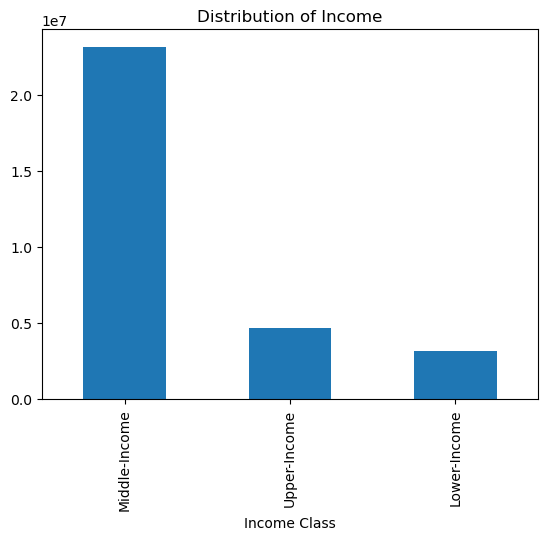

In [59]:
#creates bar chart of income_class distribution
income_bar = all_merged['income_class'].value_counts().plot.bar()
plt.title('Distribution of Income')
plt.xlabel('Income Class')

In [60]:
#exports the income distribution bar graph
income_bar.figure.savefig(os.path.join(path_3,'income_bar.png'),dpi=300, bbox_inches = "tight")

Text(0.5, 0, 'Age Group')

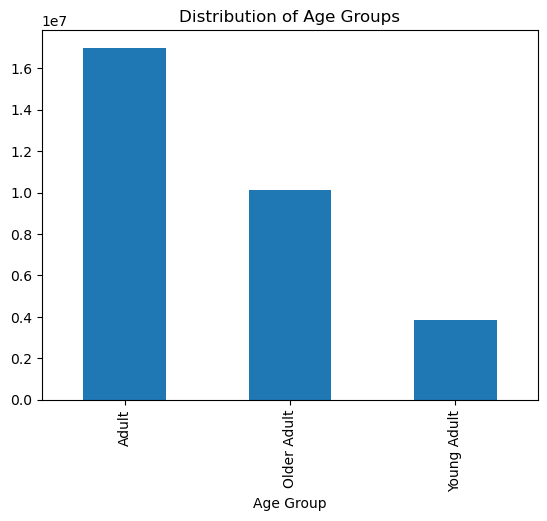

In [61]:
#creates bar chart of age_group distribution
age_bar = all_merged['age_group'].value_counts().plot.bar()
plt.title('Distribution of Age Groups')
plt.xlabel('Age Group')

In [62]:
#exports the age_group distribution bar graph
age_bar.figure.savefig(os.path.join(path_3,'age_bar.png'),dpi=300, bbox_inches = "tight")

Text(0.5, 0, 'Department')

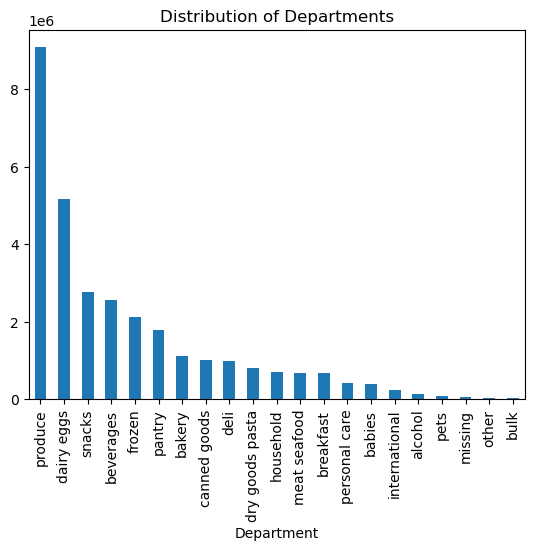

In [64]:
#creates bar chart of department distribution
department_bar = all_merged['department'].value_counts().plot.bar()
plt.title('Distribution of Departments')
plt.xlabel('Department')

In [63]:
#exports the Departments distribution bar graph
department_bar.figure.savefig(os.path.join(path_3, 'department_bar.png'), dpi = 300, bbox_inches = 'tight')

Text(0.5, 1.0, 'Customer Profile Distribution')

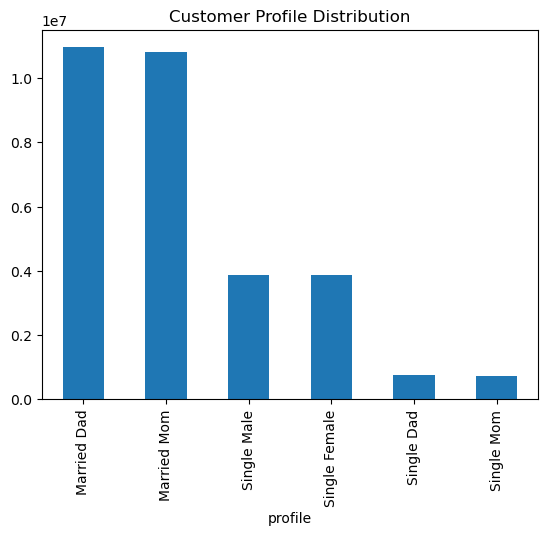

In [65]:
#creates bar chart of profile distribution
profile_bar = all_merged['profile'].value_counts().plot.bar()
plt.title('Customer Profile Distribution')

In [66]:
#exports the profile distribution bar graph
profile_bar.figure.savefig(os.path.join(path_3, 'profile_bar.png'), dpi=300, bbox_inches='tight')

## 7) Aggregation of the Max, Mean, and Min Variables on a Customer-Profile Level for Usage Frequency and Expenditure.

In [67]:
#creates a variable that contains the mean, max, and min values of the days since last order and prices columns grouped by income
income_agg = all_merged.groupby('income_class')[['days_since_last_order','prices']].agg(['mean','max','min'])

In [68]:
income_agg

days_since_last_order               prices           
                               mean   max  min      mean   max  min
income_class                                                       
Lower-Income              11.194266  30.0  0.0  6.682987  25.0  1.0
Middle-Income             10.778441  30.0  0.0  7.910370  25.0  1.0
Upper-Income              10.711185  30.0  0.0  7.943054  25.0  1.0

In [69]:
#creates a variable that contains the mean, max, and min values of the days since last order and prices columns grouped by age_group
age_agg = all_merged.groupby('age_group')[['days_since_last_order','prices']].agg(['mean','max','min'])

In [70]:
age_agg

days_since_last_order               prices           
                             mean   max  min      mean   max  min
age_group                                                        
Adult                   10.823817  30.0  0.0  7.788581  25.0  1.0
Older Adult             10.791879  30.0  0.0  7.796144  25.0  1.0
Young Adult             10.799071  30.0  0.0  7.784889  25.0  1.0

In [71]:
#creates a variable that contains the mean, max, and min values of the days since last order and prices columns grouped by department
dep_agg = all_merged.groupby('department')[['days_since_last_order','prices']].agg(['mean','max','min'])

In [72]:
dep_agg

days_since_last_order                prices           
                                 mean   max  min       mean   max  min
department                                                            
alcohol                     10.006658  30.0  0.0   8.150699  15.0  1.0
babies                       9.780844  30.0  0.0   7.634399  15.0  1.0
bakery                      10.808401  30.0  0.0   7.857482  15.0  1.0
beverages                   10.768469  30.0  0.0   7.682556  15.0  1.0
breakfast                   11.001313  30.0  0.0   8.031647  14.9  1.0
bulk                         9.880211  30.0  0.0   8.346919  14.1  1.4
canned goods                11.316872  30.0  0.0   7.546660  15.0  1.0
dairy eggs                  10.709201  30.0  0.0   8.336372  15.0  1.0
deli                        11.051389  30.0  0.0   7.783347  15.0  1.0
dry goods pasta             11.440362  30.0  0.0   7.349370  15.0  1.0
frozen                      11.413880  30.0  0.0   7.733725  15.0  1.0
household                   11.649305  30.0  0.0   7.379951  15.0  1.0
international               10.963731  30.0  0.0   7.678797  15.0  1.0
meat seafood                11.123647  30.0  0.0  16.300034  25.0  8.0
missing                      9.869551  30.0  0.0   8.660655  15.0  1.0
other                       10.624647  30.0  0.0   6.961995  15.0  1.1
pantry                      10.835976  30.0  0.0   8.014482  20.0  1.0
personal care               11.256240  30.0  0.0   7.998744  15.0  1.0
pets                        11.593531  30.0  0.0   7.887489  15.0  1.0
produce                     10.574119  30.0  0.0   7.980348  15.0  1.0
snacks                      10.671110  30.0  0.0   4.275555   7.0  1.6

In [73]:
#creates a variable that contains the mean, max, and min values of the days since last order and prices columns grouped by profile
profile_agg = all_merged.groupby('profile')[['days_since_last_order','prices']].agg(['mean','max','min'])

In [74]:
profile_agg

days_since_last_order               prices           
                               mean   max  min      mean   max  min
profile                                                            
Married Dad               10.830106  30.0  0.0  7.794041  25.0  1.0
Married Mom               10.811514  30.0  0.0  7.786463  25.0  1.0
Single Dad                10.747496  30.0  0.0  7.808355  25.0  1.0
Single Female             10.753843  30.0  0.0  7.792227  25.0  1.0
Single Male               10.829862  30.0  0.0  7.786889  25.0  1.0
Single Mom                10.754656  30.0  0.0  7.792489  25.0  1.0

In [75]:
#creates a variable that contains the mean, max, and min values of the prices column grouped by price_label
prices_agg = all_merged.groupby('price_label')['prices'].agg(['mean','max','min'])

In [76]:
prices_agg

,mean,max,min
price_label,,,
High Range Product,20.613753,25.0,15.1
Low Range Product,3.023833,5.0,1.0
Mid Range Product,9.756778,15.0,5.1


In [77]:
prices_agg.to_clipboard()

## 8) Comparing Customer Profiles with Regions and Departments and other Relevant Columns

In [78]:
#creates a df that contains the department and profile columns
dep_profile = all_merged.groupby(['department', 'profile']).size().unstack()

In [79]:
dep_profile

profile,Married Dad,Married Mom,Single Dad,Single Female,Single Male,Single Mom
department,,,,,,
alcohol,46962,52459,4595,18601,18226,3784
babies,146764,140919,10128,50469,52859,9253
bakery,392293,393456,27333,139336,142059,26351
beverages,907782,899671,60815,322421,322920,58292
breakfast,235905,235315,16851,82811,83621,16347
bulk,11934,11884,856,4081,3919,777
canned goods,361208,351369,25510,124165,126855,22967
dairy eggs,1828819,1803780,127224,647898,646478,122983
deli,353049,349284,24343,126183,127199,23776


In [80]:
#creates a df with the region and income_class columns
region_income = all_merged.groupby(['region', 'income_class']).size().unstack()

In [81]:
region_income

income_class,Lower-Income,Middle-Income,Upper-Income
region,,,
Midwest,732477,5423487,1105549
Northeast,548340,4091642,824703
South,1068988,7687756,1554395
West,796319,5925465,1205443


In [82]:
#creates a df with the age_group and region columns
age_region = all_merged.groupby(['age_group', 'region']).size().unstack()

In [83]:
age_region

region,Midwest,Northeast,South,West
age_group,,,,
Adult,4006588,2975763,5634921,4370167
Older Adult,2356770,1809013,3361229,2585595
Young Adult,898155,679909,1314989,971465


In [84]:
#creates a df with the region and profile columns
profile_region = all_merged.groupby(['region', 'profile']).size().unstack()

In [85]:
profile_region

profile,Married Dad,Married Mom,Single Dad,Single Female,Single Male,Single Mom
region,,,,,,
Midwest,2527235,2560027,179522,905542,917274,171913
Northeast,1996450,1857323,137743,663656,690826,118687
South,3655100,3568649,251334,1314256,1267677,254123
West,2768961,2809966,188997,974829,1005621,178853


In [88]:
#creates a df with the region age_group and income_class columns 
income_region_age = all_merged.groupby(['region', 'age_group', 'income_class']).size().unstack()

In [87]:
income_region_age

income_class           Lower-Income  Middle-Income  Upper-Income
region    age_group                                             
Midwest   Adult              425822        3029695        551071
          Older Adult        175269        1636925        544576
          Young Adult        131386         756867          9902
Northeast Adult              313837        2247884        414042
          Older Adult        137379        1264624        407010
          Young Adult         97124         579134          3651
South     Adult              620891        4259974        754056
          Older Adult        262463        2312837        785929
          Young Adult        185634        1114945         14410
West      Adult              454097        3307895        608175
          Older Adult        193503        1804962        587130
          Young Adult        148719         812608         10138

In [76]:
#creates a df grouped by profile and age_group 
age_profile = all_merged.groupby(['profile', 'age_group']).size().unstack() #getting age and profile distribution

In [92]:
age_profile

age_group,Adult,Older Adult,Young Adult
profile,,,
Married Dad,6399197.0,3816635.0,731914.0
Married Mom,6334889.0,3762871.0,698205.0
Single Dad,NaN,NaN,757596.0
Single Female,2113903.0,1284452.0,459928.0
Single Male,2139450.0,1248649.0,493299.0
Single Mom,NaN,NaN,723576.0


In [424]:
age_profile.to_clipboard()

In [89]:
#creates a df grouped by age_group and income class
age_income = all_merged.groupby(['age_group', 'income_class']).size().unstack() #getting age and income distribution

In [93]:
age_income

income_class,Lower-Income,Middle-Income,Upper-Income
age_group,,,
Adult,1814647,12845448,2327344
Older Adult,768614,7019348,2324645
Young Adult,562863,3263554,38101


In [97]:
age_income.to_clipboard()

In [94]:
#gets the distribution for age groups
age_dist = all_merged['age_group'].value_counts()

In [95]:
age_dist

age_group
Adult          16987439
Older Adult    10112607
Young Adult     3864518
Name: count, dtype: int64

In [98]:
age_dist.to_clipboard()

In [623]:
age_region = all_merged.groupby(['age_group', 'region']).size().unstack() #getting age and region distribution

In [618]:
age_region

region,Midwest,Northeast,South,West
age_group,,,,
Adult,4006588,2975763,5634921,4370167
Older Adult,2356770,1809013,3361229,2585595
Young Adult,898155,679909,1314989,971465


In [ ]:
age_region.to_clipboard()

In [620]:
income_dist = all_merged['income_class'].value_counts() #getting distribution table

In [622]:
income_dist.to_clipboard()

In [108]:
income_dep = all_merged.groupby('income_class')['department'].value_counts()

In [109]:
income_dep

income_class  department
Lower-Income  produce       769642
              snacks        528817
              dairy eggs    469243
              beverages     360861
              frozen        200765
                             ...  
Upper-Income  alcohol        27396
              pets           15552
              missing         9834
              other           5430
              bulk            4440
Name: count, Length: 63, dtype: int64

In [609]:
income_dist = all_merged['region'].value_counts()

In [611]:
income_dist.to_clipboard()

In [629]:
income_price = all_merged.groupby(['income_class', 'price_label']).size().unstack() #getting data for a table

## 9) Producing Charts to Illustrate Results and Exporting them into the Project Folder.

In [105]:
#creating a small random sample for lineplot
np.random.seed(4)
dev = np.random.rand(len(all_merged)) <= 0.7
small = all_merged[~dev]

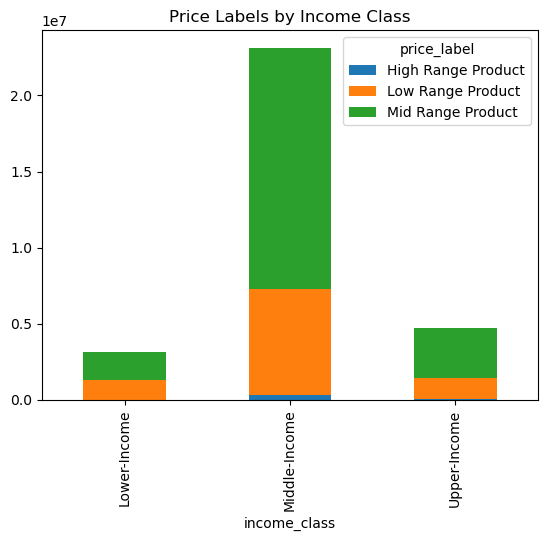

In [630]:
income_price_bar = income_price.plot.bar(stacked = True, title = 'Price Labels by Income Class')

In [631]:
income_price_bar.figure.savefig(os.path.join(path_3, 'Price Labels by Income Class'),dpi = 300, bbox_inches='tight')

In [286]:
hour_prices_line.figure.savefig(os.path.join(path_3, 'Orders by Hour and Price'),dpi = 300, bbox_inches='tight')

/tmp/ipykernel_96827/2243688901.py:2: UserWarning: The palette list has more values (23) than needed (21), which may not be intended.
  region_prices_line = sns.lineplot(data= small, x='orders_day_of_week', y='order_id', estimator='count', hue='department', palette = p, errorbar=None)


Text(0.5, 1.0, 'Order Count by Day of the Week and Department')

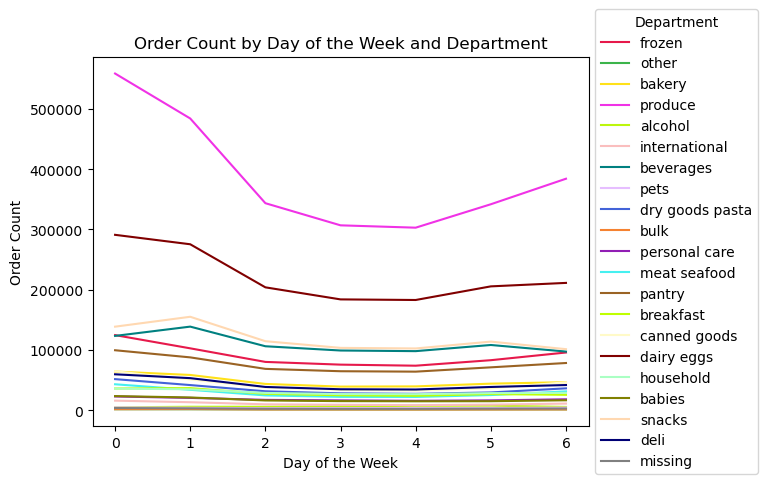

In [106]:
p = ['#e6194b', '#3cb44b', '#ffe119', '#f032e6', '#bcf60c', '#fabebe', '#008080', '#e6beff', '#4363d8', '#f58231', '#911eb4', '#46f0f0','#9a6324', '#BFFF00', '#fffac8', '#800000', '#aaffc3', '#808000', '#ffd8b1', '#000075', '#808080', '#ffffff', '#000000']
region_prices_line = sns.lineplot(data= small, x='orders_day_of_week', y='order_id', estimator='count', hue='department', palette = p, errorbar=None)
plt.legend(title='Department', loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.xlabel('Day of the Week')
plt.ylabel('Order Count')
plt.title('Order Count by Day of the Week and Department')

In [607]:
region_prices_line.figure.savefig(os.path.join(path_3, 'Departments and Days of the Week'),dpi = 300, bbox_inches='tight')

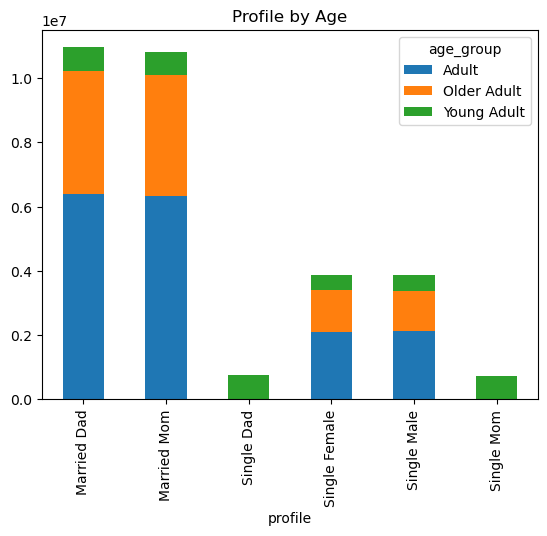

In [93]:
age_profile_stacked = age_profile.plot.bar(stacked = True, title = 'Profile by Age')

In [94]:
age_profile_stacked.figure.savefig(os.path.join(path_3, 'Age and Profile Distribution'),dpi = 300, bbox_inches='tight')

In [77]:
region_income = region_income.sort_values('Upper-Income', ascending = False)

Text(0.5, 0, 'Region')

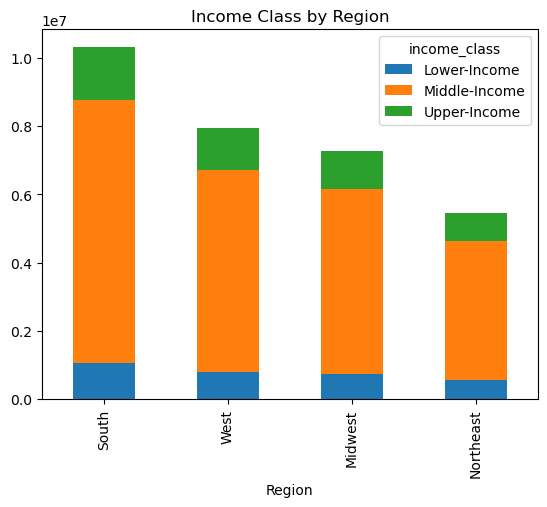

In [78]:
region_income_stacked = region_income.plot.bar(stacked = True, title = 'Income Class by Region')
plt.xlabel('Region', fontsize = 10)

In [79]:
region_income_stacked.figure.savefig(os.path.join(path_3, 'region_income_stacked.png'),dpi=300, bbox_inches='tight')

In [80]:
dep_profile = dep_profile.sort_values('Married Dad', ascending = False)

In [87]:
income_region_age = income_region_age.sort_values('Middle-Income', ascending = False)

## 10) Exporting the Final Data Set

In [90]:
all_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30964564 entries, 0 to 30964563
Data columns (total 36 columns):
 #   Column                 Dtype   
---  ------                 -----   
 0   department_id          int64   
 1   department             object  
 2   user_id                object  
 3   gender                 object  
 4   state                  object  
 5   age                    int64   
 6   date_joined            object  
 7   number_of_dependants   int64   
 8   marital_status         object  
 9   income                 int64   
 10  product_id             int64   
 11  product_name           object  
 12  aisle_id               int64   
 13  prices                 float64 
 14  order_id               int64   
 15  order_number           int64   
 16  orders_day_of_week     int64   
 17  order_hour_of_day      int64   
 18  days_since_last_order  float64 
 19  add_to_cart_order      int64   
 20  reordered              int64   
 21  _merge                 catego

In [91]:
#all_merged.to_pickle(os.path.join(path, 'orders_products_all.pkl'))